# Numerical Calculation of Covariant Lyapunov Vectors
Method using LU factorisation as described in Kuptsov, 2012.

Importing the required packages and setting the folder location

In [1]:
import os, sys
sys.path.extend([os.path.abspath('../lyp/')])

In [2]:
import numpy as np

import matplotlib.pyplot as plt


from common_systems import lorenz
from lyapunov_calcs import Lyapunov

We are using the Lorenz 1969 model for this example

In [3]:
lorenz_sys = lorenz()

In [4]:
lorenz_sys.print_system()

DynamicalSystem Parameters:
'time': t,
'variables': [x, y, z],
'parameters': [sigma, rho, beta],
'parm_vals': [10.0, 28.0, 2.6666666666666665],
'equations': [sigma*(-x + y), x*(rho - z) - y, -beta*z + x*y],
'model_dims': (3, 3),
'substitutions': [],
'jacobian': 'time': t,
'variables': [x, y, z],
'parameters': [sigma, rho, beta],
'parm_vals': [10.0, 28.0, 2.6666666666666665],
'equations': [[-sigma, sigma, 0], [rho - z, -1, -x], [y, x, -beta]],
'model_dims': (None, None),
'substitutions': [],
,



We use the `Lyapunov.covariant` class to calculate the vectors

In [5]:
lyap = Lyapunov(lorenz_sys).covariant

To speed up calculations we reduce the `max_time` parameter, this will reduce the accuracy however.

In [6]:
lyap.set_params({'max_time': 10})

In [7]:
lyap.print_params()

Covarient Parameters:
'dim': (3, 3),
'min_time': 0,
'max_time': 10,
'time_step': 0.01,
'ini_point': None,
'num_steps': 1000,
'system_functions': None,
'jacobian_functions': None,
'traj': None,
'exp': None,
'fwd_vec': None,
'bkw_vec': None,



We want to calculate all 3 covariant vectors so we include this parameter in the funcion `covariant_vectors`, note this was done for illustrative perposes, as the defualt is to find all vectors

In [8]:
%%time
cov_vec = lyap.covariant_vectors(num_vecs=3)

CPU times: user 530 ms, sys: 10.5 ms, total: 540 ms
Wall time: 521 ms


In [9]:
cov_vec

array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 0.99546773, -0.10270993,  0.00198739],
        [-0.09509344,  0.99022716, -0.03815082],
        [-0.00110883, -0.0943443 ,  0.99927002]],

       [[ 0.98210734, -0.20395578,  0.00790823],
        [-0.18778887,  0.96380742, -0.07307658],
        [ 0.01416024, -0.17168956,  0.99729498]],

       ...,

       [[-0.32710222, -0.29937126, -0.88728948],
        [-0.93150427,  0.3193457 ,  0.42122463],
        [-0.15907211,  0.89910799, -0.18784886]],

       [[-0.38823405, -0.33104796, -0.89537862],
        [-0.92087852,  0.26797118,  0.40625497],
        [-0.03545524,  0.90476444, -0.18235686]],

       [[-0.44170198, -0.36077826, -0.90348059],
        [-0.89351377,  0.21649241,  0.39017091],
        [ 0.08082395,  0.90717699, -0.17745275]]])

In [22]:
norms = list()
for i in range(cov_vec.shape[0]):
    norms.append(np.linalg.norm(cov_vec[i], axis=1))

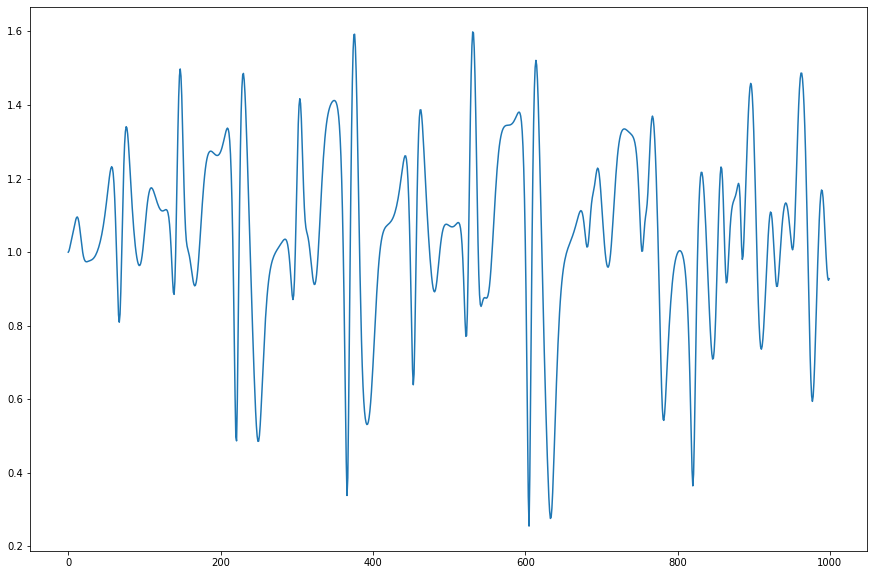

In [27]:
fig = plt.figure(figsize=(15, 10))
plt.plot(np.array(norms)[:, 2])
plt.show()